In [610]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, confusion_matrix

In [611]:
housing = pd.read_csv("/content/Housing.csv")
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [612]:
housing_select = housing[['price', 'bedrooms', 'mainroad', 'bathrooms','basement', 'prefarea','furnishingstatus', 'parking', 'airconditioning', 'guestroom', 'hotwaterheating']]
housing_select.head

<bound method NDFrame.head of         price  bedrooms mainroad  bathrooms basement prefarea  \
0    13300000         4      yes          2       no      yes   
1    12250000         4      yes          4       no       no   
2    12250000         3      yes          2      yes      yes   
3    12215000         4      yes          2      yes      yes   
4    11410000         4      yes          1      yes       no   
..        ...       ...      ...        ...      ...      ...   
540   1820000         2      yes          1      yes       no   
541   1767150         3       no          1       no       no   
542   1750000         2      yes          1       no       no   
543   1750000         3       no          1       no       no   
544   1750000         3      yes          1       no       no   

    furnishingstatus  parking airconditioning guestroom hotwaterheating  
0          furnished        2             yes        no              no  
1          furnished        3            

In [613]:
housing_select.describe()

,price,bedrooms,bathrooms,parking
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,2.965138,1.286239,0.693578
std,1.870440e+06,0.738064,0.502470,0.861586
min,1.750000e+06,1.000000,1.000000,0.000000
25%,3.430000e+06,2.000000,1.000000,0.000000
50%,4.340000e+06,3.000000,1.000000,0.000000
75%,5.740000e+06,3.000000,2.000000,1.000000
max,1.330000e+07,6.000000,4.000000,3.000000


### **Check for data type**

In [614]:
housing_select.dtypes

price                int64
bedrooms             int64
mainroad            object
bathrooms            int64
basement            object
prefarea            object
furnishingstatus    object
parking              int64
airconditioning     object
guestroom           object
hotwaterheating     object
dtype: object

In [615]:
housing_select['mainroad'] = housing_select['mainroad'].astype('category')
housing_select['airconditioning'] = housing_select['airconditioning'].astype('category')
housing_select['guestroom'] = housing_select['guestroom'].astype('category')
housing_select['hotwaterheating'] = housing_select['hotwaterheating'].astype('category')
housing_select['prefarea'] = housing_select['prefarea'].astype('category')
housing_select['furnishingstatus'] = housing_select['furnishingstatus'].astype('category')

housing_select.dtypes

<ipython-input-615-4b001dd81b27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_select['mainroad'] = housing_select['mainroad'].astype('category')
<ipython-input-615-4b001dd81b27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_select['airconditioning'] = housing_select['airconditioning'].astype('category')
<ipython-input-615-4b001dd81b27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


price                  int64
bedrooms               int64
mainroad            category
bathrooms              int64
basement              object
prefarea            category
furnishingstatus    category
parking                int64
airconditioning     category
guestroom           category
hotwaterheating     category
dtype: object

### **Check for Missing values**


In [616]:
housing_select.isna().sum()

price               0
bedrooms            0
mainroad            0
bathrooms           0
basement            0
prefarea            0
furnishingstatus    0
parking             0
airconditioning     0
guestroom           0
hotwaterheating     0
dtype: int64

### **Check for 'price' outliers**




<Axes: xlabel='price'>

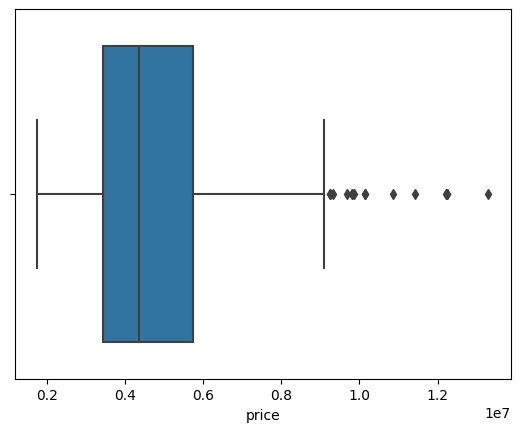

In [617]:
sns.boxplot(x=housing_select['price'])

Remove outliers

In [618]:
q1 = housing_select['price'].quantile(.25)
q3 = housing_select['price'].quantile(.75)
iqr = q3 - q1
threshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr
housing_normal = housing_select[(housing_select['price'] > lower_fence)&(housing_select['price']<upper_fence)]

In [619]:
housing_select.shape

(545, 11)

In [620]:
housing_normal.shape

(530, 11)

<Axes: xlabel='price'>

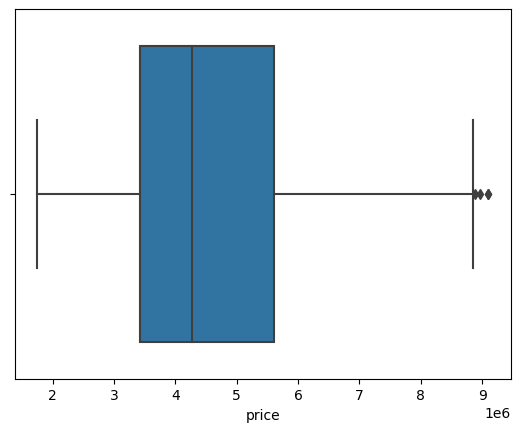

In [621]:
sns.boxplot(x=housing_normal['price'])

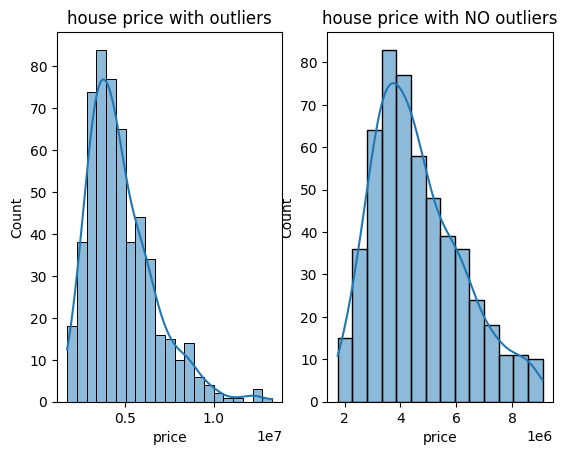

In [622]:
plt.subplot(1, 2, 2)
sns.histplot(data=housing_normal, x='price', kde=True)
plt.title('house price with NO outliers')

plt.subplot(1, 2, 1)
sns.histplot(data=housing_select, x='price', kde=True)
plt.title('house price with outliers')
plt.show()

### Preparing Data mainroad using dummies
As data mainroad are categorical, it is important to prepare the data using dummies to make it numerical data

In [623]:
mainrd = ['mainroad']
housing_select[mainrd].describe()

,mainroad
count,545
unique,2
top,yes
freq,468


In [624]:
base = ['basement']
housing_select[base].describe()

,basement
count,545
unique,2
top,no
freq,354


In [625]:
frniture =['furnishingstatus']
housing_select[frniture].describe()

,furnishingstatus
count,545
unique,3
top,semi-furnished
freq,227


In [626]:
prefarea = ['prefarea']
housing_select[prefarea].describe()

,prefarea
count,545
unique,2
top,no
freq,417


In [627]:
ac = ['airconditioning']
housing_select[ac].describe()

,airconditioning
count,545
unique,2
top,no
freq,373


In [628]:
gst_room = ['guestroom']
housing_select[gst_room].describe()

,guestroom
count,545
unique,2
top,no
freq,448


In [629]:
ht_wtr = ['hotwaterheating']
housing_select[ht_wtr].describe()

,hotwaterheating
count,545
unique,2
top,no
freq,520


In [630]:
housing_select.head()

,price,bedrooms,mainroad,bathrooms,basement,prefarea,furnishingstatus,parking,airconditioning,guestroom,hotwaterheating
0,13300000,4,yes,2,no,yes,furnished,2,yes,no,no
1,12250000,4,yes,4,no,no,furnished,3,yes,no,no
2,12250000,3,yes,2,yes,yes,semi-furnished,2,no,no,no
3,12215000,4,yes,2,yes,yes,furnished,3,yes,no,no
4,11410000,4,yes,1,yes,no,furnished,2,yes,yes,no


In [631]:
housing_select = pd.get_dummies(housing_select, columns=mainrd, drop_first=True)
housing_select = pd.get_dummies(housing_select, columns=ac, drop_first=True)
housing_select = pd.get_dummies(housing_select, columns=gst_room, drop_first=True)
housing_select = pd.get_dummies(housing_select, columns=ht_wtr, drop_first=True)
housing_select = pd.get_dummies(housing_select, columns=prefarea, drop_first=True)
housing_select = pd.get_dummies(housing_select, columns=frniture, drop_first=True)
housing_select = pd.get_dummies(housing_select, columns=base, drop_first=True)

housing_select.head()

,price,bedrooms,bathrooms,parking,mainroad_yes,airconditioning_yes,guestroom_yes,hotwaterheating_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,basement_yes
0,13300000,4,2,2,1,1,0,0,1,0,0,0
1,12250000,4,4,3,1,1,0,0,0,0,0,0
2,12250000,3,2,2,1,0,0,0,1,1,0,1
3,12215000,4,2,3,1,1,0,0,1,0,0,1
4,11410000,4,1,2,1,1,1,0,0,0,0,1


In [632]:
numeric_var = ['price']
scaler = StandardScaler()
housing_select[numeric_var] = scaler.fit_transform(housing_select[numeric_var])

housing_select.head()

,price,bedrooms,bathrooms,parking,mainroad_yes,airconditioning_yes,guestroom_yes,hotwaterheating_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,basement_yes
0,4.566365,4,2,2,1,1,0,0,1,0,0,0
1,4.004484,4,4,3,1,1,0,0,0,0,0,0
2,4.004484,3,2,2,1,0,0,0,1,1,0,1
3,3.985755,4,2,3,1,1,0,0,1,0,0,1
4,3.554979,4,1,2,1,1,1,0,0,0,0,1


# Create Models

- Declare the Dependent and Independent Variables
X = Independent Variable
Y = Dependent Variable

Y = price
1.   Model 1: X - bedrooms, bathrooms
2.   Model 2: X - bedrooms, bathrooms, parking
3.   Model 3: X - bedrooms, bathrooms, parking, mainroad






## - First Model

1. Creating first model

In [633]:
X1 = housing_select[['bedrooms', 'bathrooms']]
Y1 = housing_select['price']

2. Split the dataset into training and testing sets




In [634]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

3. Initialize the Linear Regression model

In [635]:
model = LinearRegression()

4. Fit the model

In [636]:
model.fit(X_train, Y_train)

LinearRegression()

5. Predict on the test set

In [637]:
y_pred = model.predict(X_test)

6. Evaluate the model

In [638]:
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared: {r_squared}")

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

mse = mean_squared_error(Y_test, y_pred)
print(f"Mean squared error: {mse}")

R-squared: 0.2605701076698278
Adjusted R-squared: 0.2466186002673717
Mean squared error: 1.070265332447618


7. Create a DataFrame with feature names and coefficients,


display the  coefficient

In [639]:
coef_df = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model.coef_})
print(coef_df)

     Feature  Coefficient
0   bedrooms     0.242108
1  bathrooms     0.900900


8. Find the intercept value

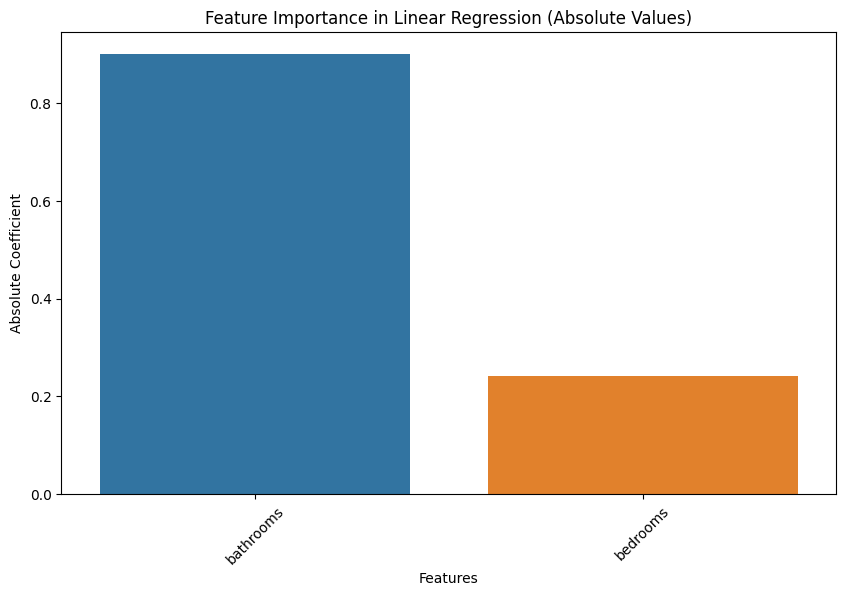

In [640]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.ylabel('Absolute Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [641]:
intercept = model.intercept_
print(intercept)

-1.8891323547277457


model 1:
Y = -0.0125 + (0.1785 x bedrooms) + (0.4523 x bathrooms)

## - Second Model

1. Creating second model

In [642]:
X2 = housing_select[['bedrooms', 'bathrooms', 'parking']]
Y2 = housing_select['price']

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [643]:
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared: {r_squared}")

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

mse = mean_squared_error(Y_test, y_pred)
print(f"Mean squared error: {mse}")

R-squared: 0.35927577259623034
Adjusted R-squared: 0.3409693660989799
Mean squared error: 0.9273968166049447


In [644]:
coef_df = pd.DataFrame({'Feature': X2.columns, 'Coefficient': model.coef_})
print(coef_df)

     Feature  Coefficient
0   bedrooms     0.215391
1  bathrooms     0.812327
2    parking     0.302035


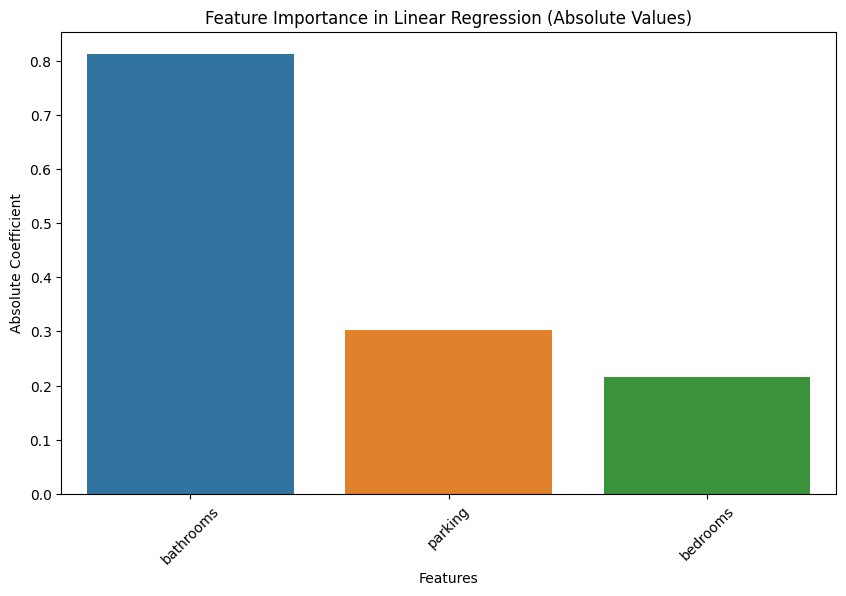

In [645]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.ylabel('Absolute Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [646]:
intercept = model.intercept_
print(intercept)

-1.9050767080288138


## - Third Model

1. Creating third model

In [647]:
X3 = housing_select[['bedrooms', 'bathrooms', 'parking', 'mainroad_yes']]
Y3 = housing_select['price']

X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [648]:
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared: {r_squared}")

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

mse = mean_squared_error(Y_test, y_pred)
print(f"Mean squared error: {mse}")

R-squared: 0.4048614103660153
Adjusted R-squared: 0.38197146461086195
Mean squared error: 0.8614152701884653


In [649]:
coef_df = pd.DataFrame({'Feature': X3.columns, 'Coefficient': model.coef_})
print(coef_df)

        Feature  Coefficient
0      bedrooms     0.225270
1     bathrooms     0.801554
2       parking     0.250411
3  mainroad_yes     0.642532


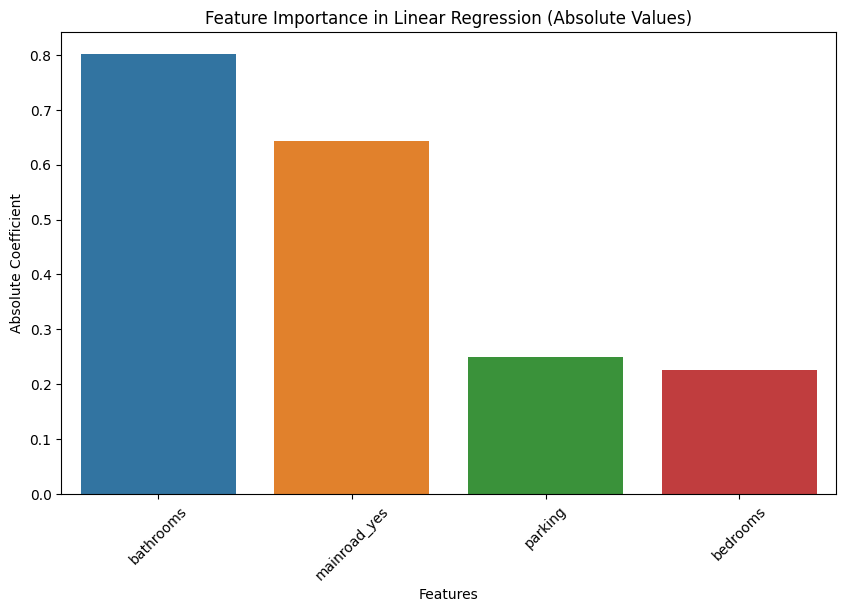

In [650]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.ylabel('Absolute Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [651]:
intercept = model.intercept_
print(intercept)

-2.4364255724885


## Fourth Model

In [652]:
X4 = housing_select[['bedrooms', 'bathrooms', 'parking', 'mainroad_yes','airconditioning_yes', 'guestroom_yes',	'hotwaterheating_yes','prefarea_yes',	'furnishingstatus_semi-furnished','furnishingstatus_unfurnished',	'basement_yes']]
Y4 = housing_select['price']

X_train, X_test, Y_train, Y_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [653]:
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared: {r_squared}")

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

mse = mean_squared_error(Y_test, y_pred)
print(f"Mean squared error: {mse}")

R-squared: 0.5708854770213114
Adjusted R-squared: 0.5222230053433158
Mean squared error: 0.6211087790170299


In [659]:
coef_df = pd.DataFrame({'Feature': X4.columns, 'Coefficient': model.coef_})
print(coef_df)

                            Feature  Coefficient
0                          bedrooms     0.139692
1                         bathrooms     0.704481
2                           parking     0.178460
3                      mainroad_yes     0.399087
4               airconditioning_yes     0.574134
5                     guestroom_yes     0.255771
6               hotwaterheating_yes     0.406683
7                      prefarea_yes     0.409315
8   furnishingstatus_semi-furnished    -0.102068
9      furnishingstatus_unfurnished    -0.272431
10                     basement_yes     0.047975


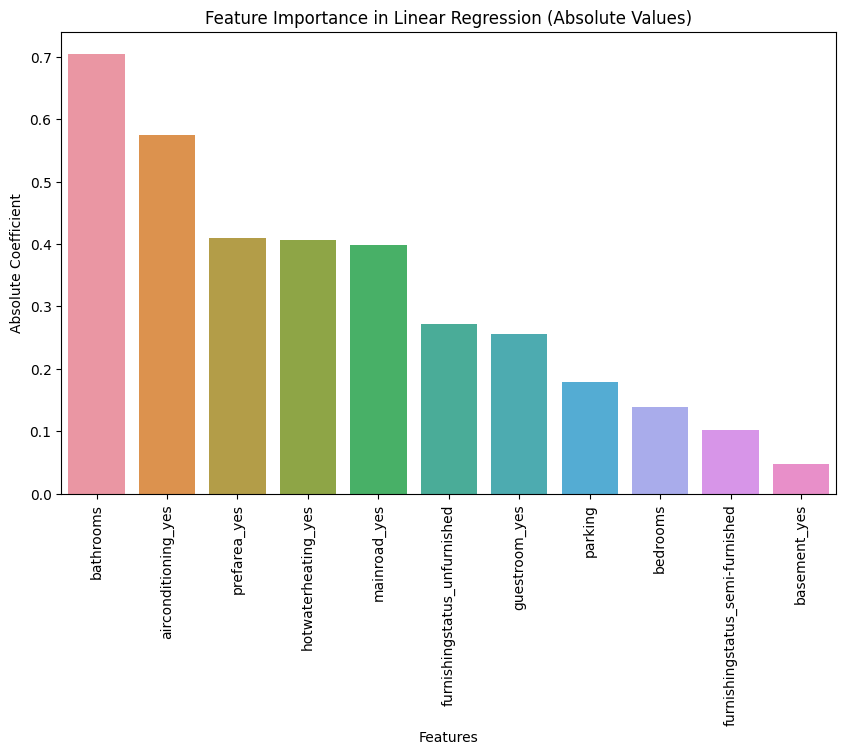

In [660]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.ylabel('Absolute Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

In [656]:
intercept = model.intercept_
print(intercept)

-2.0281951076890494
